In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv('Documents/BreastCancer.csv', names = names)

In [12]:
df.head() # Class 2 = benign 4 = malignant

,Code_number,Clump_Thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Singe_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
names = ['Code_number', 'Clump_Thickness', 'Uniform_Cell_Size', 'Uniform_Cell_Shape', 'Marginal_Adhesion',
        'Singe_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [13]:
df.shape

(699, 11)

In [14]:
df.isnull().sum()

Code_number                   0
Clump_Thickness               0
Uniform_Cell_Size             0
Uniform_Cell_Shape            0
Marginal_Adhesion             0
Singe_Epithelial_Cell_Size    0
Bare_Nuclei                   0
Bland_Chromatin               0
Normal_Nucleoli               0
Mitoses                       0
Class                         0
dtype: int64

In [18]:
import missingno as msno

In [19]:
no.bar(df)

NameError: name 'no' is not defined

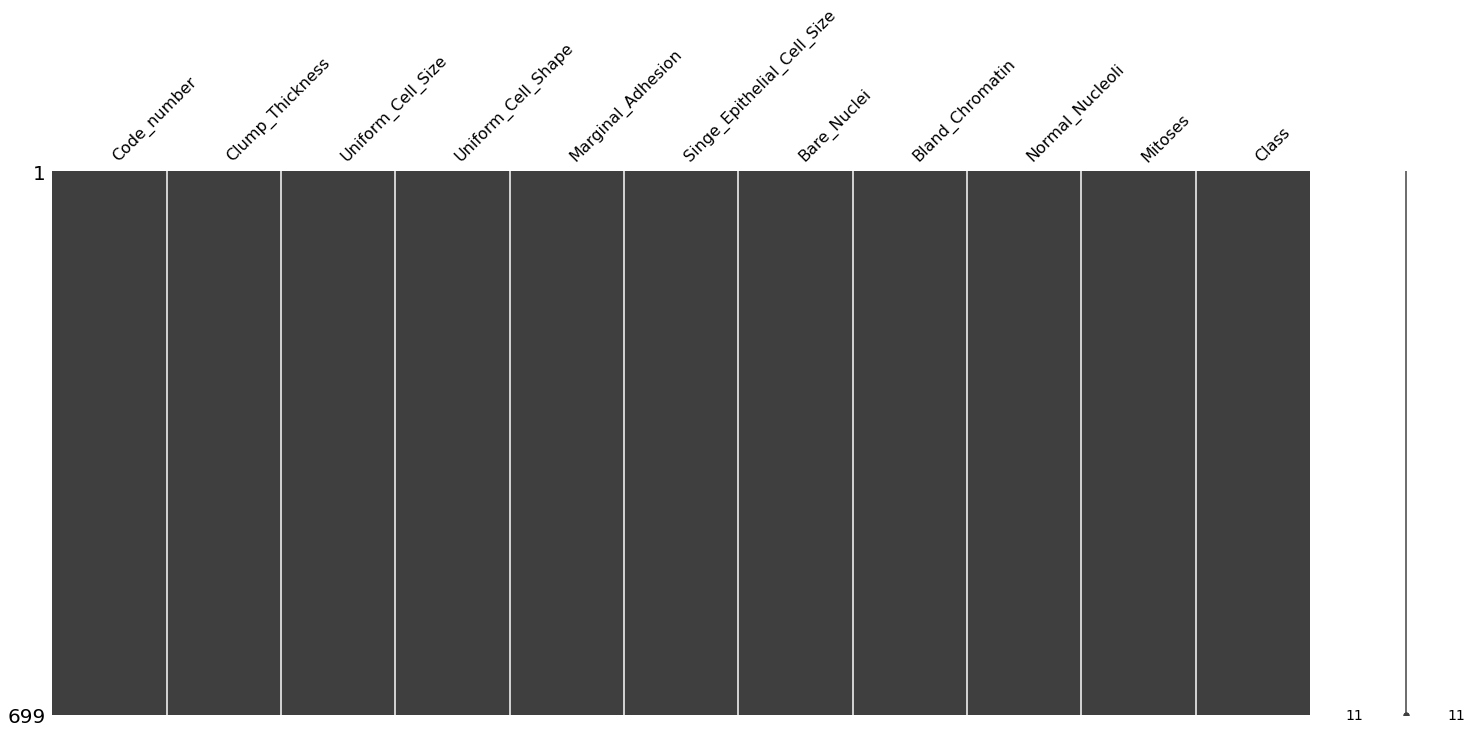

In [20]:
msno.matrix(df)

In [21]:
df.dtypes

Code_number                    int64
Clump_Thickness                int64
Uniform_Cell_Size              int64
Uniform_Cell_Shape             int64
Marginal_Adhesion              int64
Singe_Epithelial_Cell_Size     int64
Bare_Nuclei                   object
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [22]:
df.groupby('Class').size()

Class
2    458
4    241
dtype: int64

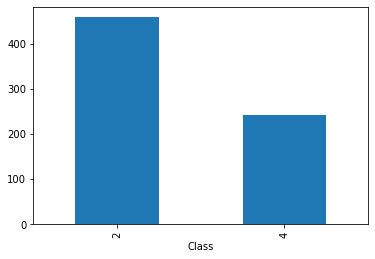

In [23]:
df.groupby('Class').size().plot(kind = 'bar')

In [24]:
corr = df.corr()

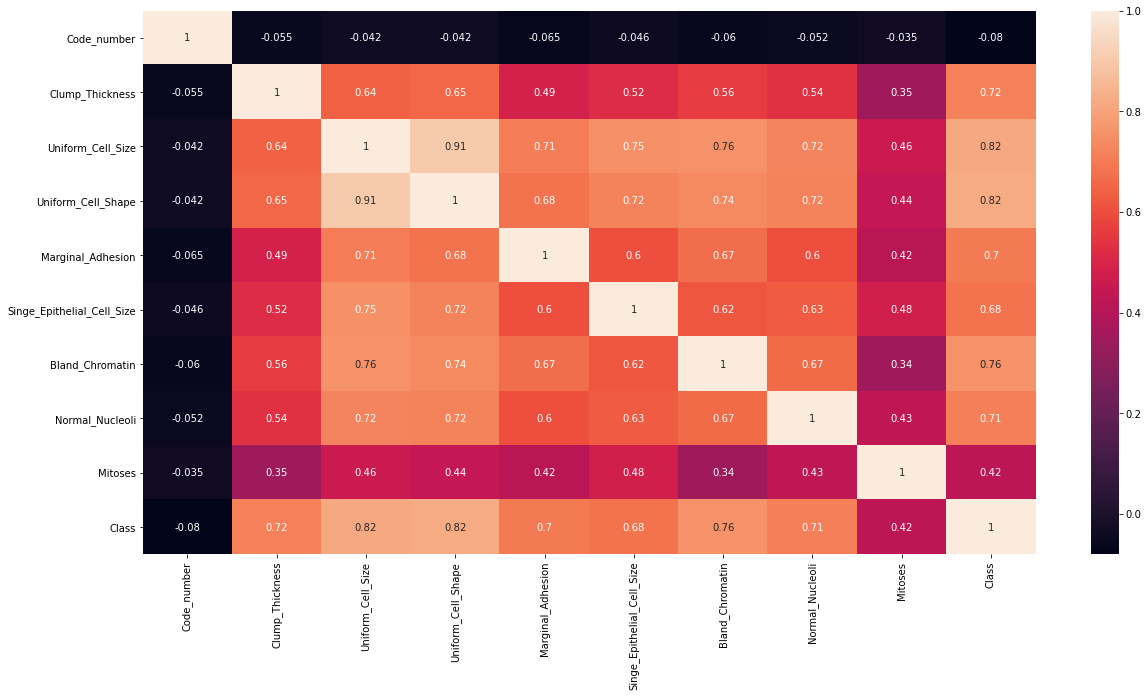

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True)
plt.show()

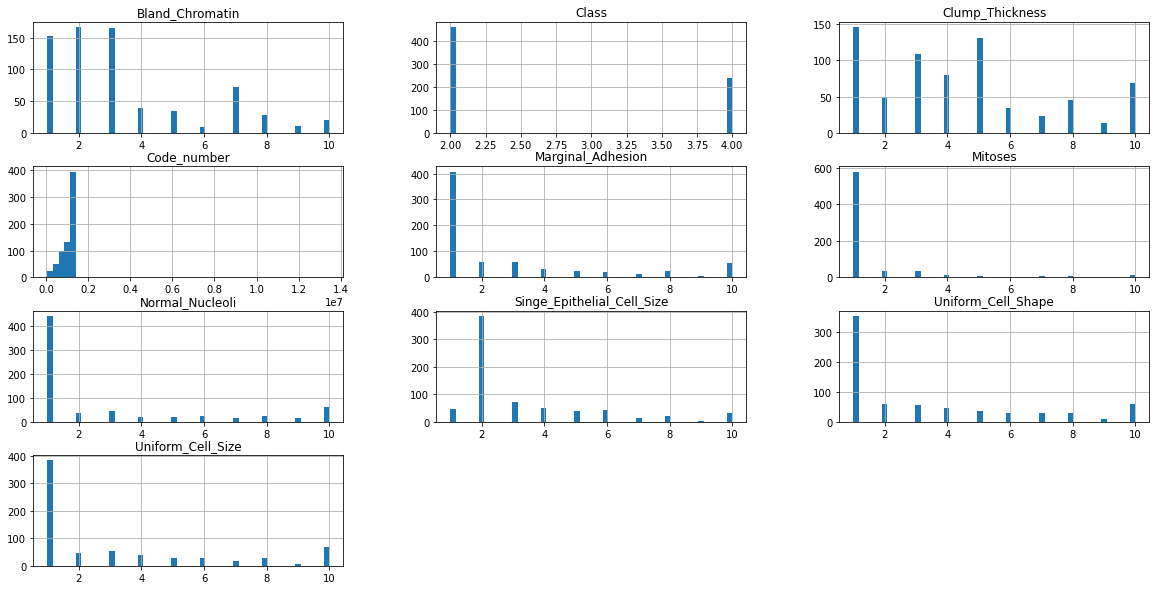

In [26]:
df.hist(bins = 50, figsize = (20, 10))
plt.show()

In [27]:
df.describe()

,Code_number,Clump_Thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Singe_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Code_number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniform_Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniform_Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Singe_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [29]:
# We need to convert Bare Nuclei from obj to int64
df['Bare_Nuclei'].dtype

dtype('O')

In [30]:
df[df['Bare_Nuclei'] == '?']

,Code_number,Clump_Thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Singe_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [31]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].replace(to_replace = '?', value = 0)

In [32]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)

In [33]:
df.dtypes

Code_number                   int64
Clump_Thickness               int64
Uniform_Cell_Size             int64
Uniform_Cell_Shape            int64
Marginal_Adhesion             int64
Singe_Epithelial_Cell_Size    int64
Bare_Nuclei                   int32
Bland_Chromatin               int64
Normal_Nucleoli               int64
Mitoses                       int64
Class                         int64
dtype: object

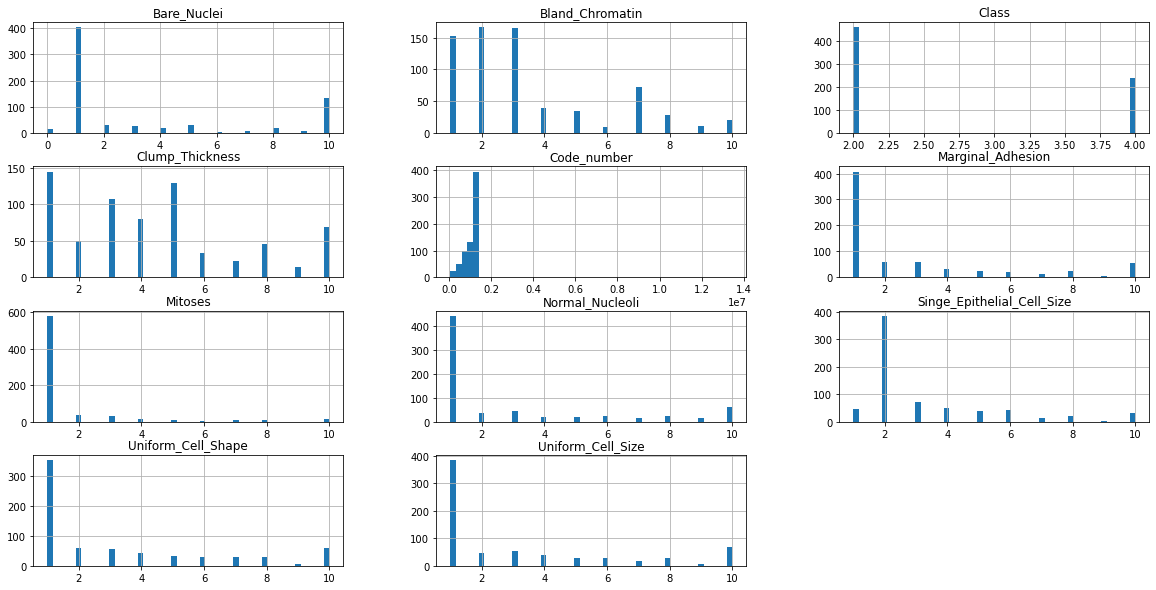

In [34]:
df.hist(bins = 50, figsize = (20,10))
plt.show()

# Feature Prep

In [35]:
df.columns

Index(['Code_number', 'Clump_Thickness', 'Uniform_Cell_Size',
       'Uniform_Cell_Shape', 'Marginal_Adhesion', 'Singe_Epithelial_Cell_Size',
       'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses',
       'Class'],
      dtype='object')

In [36]:
Xfeatures = df[['Clump_Thickness', 'Uniform_Cell_Size',
       'Uniform_Cell_Shape', 'Marginal_Adhesion', 'Singe_Epithelial_Cell_Size',
       'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]

In [37]:
Ylabels = df['Class']

# Scale the Dataset

In [38]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [39]:
Scaler = Scaler()
X = Scaler.fit_transform(Xfeatures)

In [40]:
X

array([[0.44444444, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.44444444, 0.33333333, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.44444444, 1.        , 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.33333333, 0.77777778, 0.55555556, ..., 1.        , 0.55555556,
        0.        ],
       [0.33333333, 0.77777778, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

In [41]:
X.shape

(699, 9)

In [42]:
names[1:10]

['Clump_Thickness',
 'Uniform_Cell_Size',
 'Uniform_Cell_Shape',
 'Marginal_Adhesion',
 'Singe_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses']

In [48]:
X = pd.DataFrame(X, columns = names[1:10])

In [49]:
X.head()

,Clump_Thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Singe_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.1,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.0,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.2,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.4,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.1,0.222222,0.000000,0.0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Ylabels, test_size = 0.2, random_state = 42)

In [51]:
logit = LogisticRegression()

In [52]:
logit.fit(X_train, y_train)

LogisticRegression()

In [55]:
print("Logistic Regression Accuracy Score: ",logit.score(X_test, y_test))

Logistic Regression Accuracy Score:  0.9714285714285714


In [56]:
X_test.values[0]

array([0.        , 0.        , 0.11111111, 0.        , 0.22222222,
       0.        , 0.        , 0.        , 0.        ])

In [57]:
logit.predict(np.array(X_test.values[0]).reshape(1, -1)) # Result with Array of 0 is Begign

array([2], dtype=int64)

In [ ]:
X_test.values[15]

In [58]:
logit.predict(np.array(X_test.values[15]).reshape(1, -1)) # Result with Array of 15 is Melignant

array([4], dtype=int64)

# Using Shap Explainers

In [59]:
import shap

In [60]:
shap.initjs()

In [61]:
explainer = shap.KernelExplainer(logit.predict_proba, X_train)

Using 559 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [62]:
shap_values = explainer.shap_values(X_test.iloc[0,:])

In [63]:
X_test.iloc[0,:]

Clump_Thickness               0.000000
Uniform_Cell_Size             0.000000
Uniform_Cell_Shape            0.111111
Marginal_Adhesion             0.000000
Singe_Epithelial_Cell_Size    0.222222
Bare_Nuclei                   0.000000
Bland_Chromatin               0.000000
Normal_Nucleoli               0.000000
Mitoses                       0.000000
Name: 158, dtype: float64

In [66]:
explainer.expected_value[0]

0.6493739797159788

In [67]:
shap_values[0]

array([0.08048153, 0.03391904, 0.03630973, 0.01975586, 0.00790084,
       0.10427389, 0.03905035, 0.01614852, 0.00500373])

In [64]:
shap.force_plot(explainer.expected_value[0],shap_values[0],X_test.iloc[0,:])

In [68]:
shap.force_plot(explainer.expected_value[1],shap_values[1],X_test.iloc[0,:])

In [69]:
X_test.iloc[15,:]

Clump_Thickness               1.000000
Uniform_Cell_Size             1.000000
Uniform_Cell_Shape            0.777778
Marginal_Adhesion             1.000000
Singe_Epithelial_Cell_Size    0.555556
Bare_Nuclei                   0.500000
Bland_Chromatin               1.000000
Normal_Nucleoli               0.222222
Mitoses                       0.000000
Name: 569, dtype: float64

In [71]:
shap_values2 = explainer.shap_values(X_test.iloc[15,:])

In [73]:
shap_values2[0]

array([-0.15281784, -0.10197129, -0.10086019, -0.0724299 , -0.02722951,
       -0.06792975, -0.11505549, -0.00891325,  0.00110955])

In [74]:
shap.force_plot(explainer.expected_value[0], shap_values2[0], X_test.iloc[15,:])

In [75]:
shap.force_plot(explainer.expected_value[1], shap_values2[1], X_test.iloc[15,:])

In [76]:
shap_values_all = explainer.shap_values(X_test)

In [77]:
shap.force_plot(explainer.expected_value[0], shap_values_all[0], X_test)

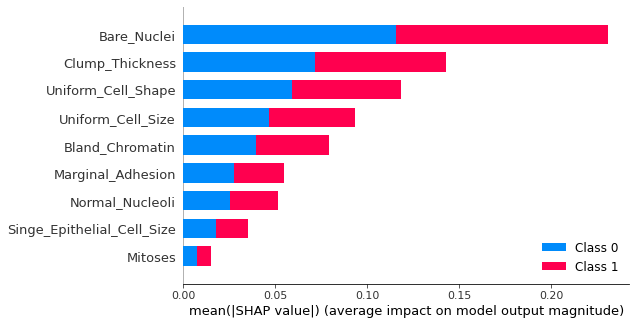

In [78]:
shap.summary_plot(shap_values_all, X_test)

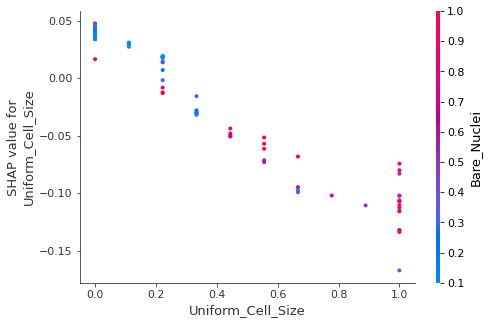

In [81]:
shap.dependence_plot(1, shap_values_all[0], X_test)

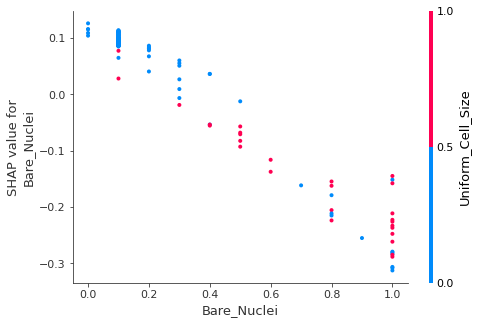

In [82]:
shap.dependence_plot("Bare_Nuclei", shap_values_all[0], X_test)

## Eli5

In [83]:
import eli5

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


In [84]:
df.columns

Index(['Code_number', 'Clump_Thickness', 'Uniform_Cell_Size',
       'Uniform_Cell_Shape', 'Marginal_Adhesion', 'Singe_Epithelial_Cell_Size',
       'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses',
       'Class'],
      dtype='object')

In [85]:
feature_names = ['Clump_Thickness', 'Uniform_Cell_Size',
       'Uniform_Cell_Shape', 'Marginal_Adhesion', 'Singe_Epithelial_Cell_Size',
       'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']

In [86]:
Ylabels.unique()

array([2, 4], dtype=int64)

In [87]:
class_names = ['Benign', 'Malignant']

In [88]:
eli5.show_weights(logit, top = 9)

In [91]:
eli5.show_weights(logit, feature_names = feature_names, target_names = class_names, top = 10)

Weight?,Feature
+3.067,Bare_Nuclei
+2.681,Clump_Thickness
+2.021,Uniform_Cell_Shape
+1.840,Bland_Chromatin
+1.520,Uniform_Cell_Size
+1.115,Marginal_Adhesion
+1.001,Singe_Epithelial_Cell_Size
+0.877,Normal_Nucleoli
+0.873,Mitoses
-5.295,<BIAS>


In [92]:
eli5.show_prediction(logit, X_test.iloc[0], feature_names = feature_names, target_names = class_names)

In [93]:
eli5.show_prediction(logit, X_test.iloc[15], feature_names = feature_names, target_names = class_names)